# How first-time airbnb users travel

## Act I: Setup
New users on Airbnb can book a place to stay in 34,000+ cities across 190+ countries. By accurately predicting where a new user will book their first travel experience, Airbnb can share more personalized content with their community, decrease the average time to first booking, and better forecast demand.

Airbnb challenges you to predict in which destination country - 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found) or 'other'- a new user from the USA will make his or her first booking.

## Act II: Confrontation

## Act III: Resolution



***
***
## Data Exploration

Questions that I would like to explore using the summary data provided are:
1. Are there missing data or dat munging that need to be done?
2. Are there any outliers?
3. What are the similarities/differences in the destination countries?
4. Demographic differences that could point to preferences?
5. Investigate the link with how/ and for how long a user interacts with the website has on destination selection.

In [3]:
# load libraries that will be used
%matplotlib inline

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from mpl_toolkits.basemap import Basemap

C:\Miniconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Dataset #1: Nine Potential Countries to Visits 

In [97]:
# unzip and read country data
zf = zipfile.ZipFile('data/countries.csv.zip')
countries = pd.read_csv(zf.open('countries.csv'))

http://travel.trade.gov/view/m-2015-O-001/index.html

In [19]:
print("Rows: %0.0f; Columns: %0.0f" % np.shape(countries))
countries.head(10)

Rows: 10; Columns: 7


,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675,eng,0.00


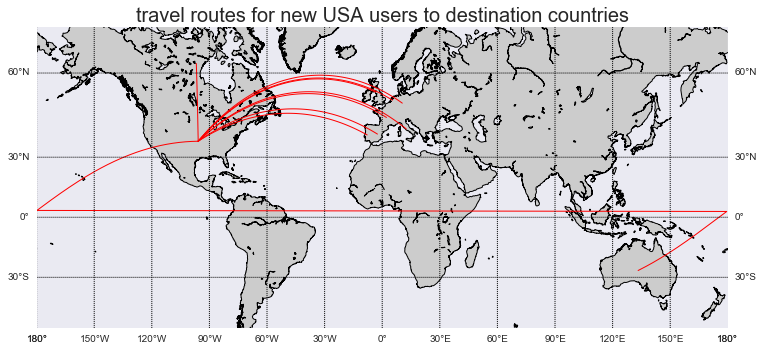

In [159]:
# create new figure, axes instances.
fig=plt.figure(figsize=(12,9))
ax=fig.add_axes([0.1,0.1,0.8,0.8])

# setup mercator map projection as map background
m = Basemap(llcrnrlon=-180.,llcrnrlat=-50.,urcrnrlon=180.,urcrnrlat=70.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)

# draw great circle route between USA and destination countries
dest_lon = countries.lng_destination
dest_lat = countries.lat_destination
usa_lon = dest_lon[9]
usa_lat = dest_lat[9]
destinations = len(countries.country_destination)-1 # minus one in order to exclude USA at the end
for i in range(destinations):
    m.drawgreatcircle(usa_lon, usa_lat, dest_lon[i], dest_lat[i], linewidth=1, color='r')

# draw map details
m.drawcoastlines()
m.fillcontinents()
# draw parallels
m.drawparallels(np.arange(-60,90,30),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

ax.set_title('travel routes for new USA users to destination countries', size=20)
plt.show()

The above picture highlights the fact that the majority, 7 out of the 10 destination coutries, lie within the Europe. Part of the appeal of going to at least 6 out of the 10 countries is that they are all within the European Union which makes it easy to move between the countries, as well as having the same currency. This brings up the possiblity that the choosen destination country might be favoured as a starting point for a trip around Europe and with the idea of staying in a country for the whole duration of the trip.

On the other side of the spectrum, I would group the USA, Canada and Australia under the umbrella of being large countries with lots to explore so you would tend to stay within these countries for the duration of the trip and not venture to other countries as part of the trip. Canada could be of interest to an American tourist because of it's proximity and the linked currency means there is no exchange rate risk to bump up the budgeted cost of a trip. Canada also hold a lot of natural splendour and you could practice your French in Montreal. Australia on the other hand is the only country from the southern hemisphere and could hold appeal beacuse of it's exotic wild life, beaches and more. Likewise the USA hold many attractions and most Americans tend to holiday within their own country.

According to [data](http://travel.trade.gov/view/m-2015-O-001/index.html) released by the U.S. Department of Commerce, International Trade Administration, National Travel and Tourism Office (NTTO) on 29 December 2015; 61,322,698 U.S. citizens traveled to international regions in the first 10 months of 2015. About 54.9% was to either Mexico (22,641,533 U.S. citizens; 36.9% of total) and Canada (11,008,848; 18%). All of Europe saw just above the number of U.S. citizens as Canada (11,067,879; 18% of total), but half that of Mexico and Oceania (used as proxy for Australia in this example) saw 0.8% (511,563) of U.S. citizens come to their shores in 2015. 

Based on this supporting dat, my hunch is that U.S. Citizens are more likely to favour Canada and European countries to Australia. And with 458.3 million business trips and 1,692.8 million leisure trips by U.S. citizens in [2015](http://www.statista.com/statistics/207103/forecasted-number-of-domestic-trips-in-the-us/), I'm confident that domestic travel within the USA would hold great appeal to USA users of airbnb as well. 

***
### Dataset #2: Compare demographic distributions within destination countries 

In [98]:
# unzip and read user age and gender data
zf = zipfile.ZipFile('data/age_gender_bkts.csv.zip')
demographics = pd.read_csv(zf.open('age_gender_bkts.csv'))

In [8]:
print("Rows: %0.0f; Columns: %0.0f" % np.shape(demographics))
demographics.head()

Rows: 420; Columns: 5


,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1,2015
1,95-99,AU,male,9,2015
2,90-94,AU,male,47,2015
3,85-89,AU,male,118,2015
4,80-84,AU,male,199,2015


In [142]:
#get a better feel for the underlying values:
for column in demographics[['age_bucket','country_destination','gender','year']]:
    print(demographics[column].unique())

['100+' '95-99' '90-94' '85-89' '80-84' '75-79' '70-74' '65-69' '60-64'
 '55-59' '50-54' '45-49' '40-44' '35-39' '30-34' '25-29' '20-24' '15-19'
 '10-14' '5-9' '0-4']
['AU' 'CA' 'DE' 'ES' 'FR' 'GB' 'IT' 'NL' 'PT' 'US']
['male' 'female']
[ 2015.]


So it looks like this dataset is a summary of gender and age band per country of users for 1 year, 2015.

But what else can it tell us?

In [154]:
print('Total number of users: ' + str('{:5,.0f}'.format(demographics['population_in_thousands'].sum())) + ' thousand')
print('')
print(demographics.groupby('gender')['population_in_thousands'].sum())

Total number of users: 732,116 thousand

gender
female    372207
male      359909
Name: population_in_thousands, dtype: float64


In [272]:
gender = demographics[['country_destination','gender','population_in_thousands']].groupby(['country_destination','gender']).sum().unstack()
gender.reset_index(inplace=True)
gender.columns = ['country_destination', 'female', 'male']
gender['pop_in_thousands'] = gender['female'] + gender['male']
gender['pop_proportion'] = gender['pop_in_thousands'] / gender['pop_in_thousands'].sum()*100
gender.sort_values('pop_in_thousands', ascending=False)

,country_destination,female,male,pop_in_thousands,pop_proportion
9,US,165053,160079,325132,44.409902
2,DE,41997,40565,82562,11.277175
4,FR,33493,31490,64983,8.876052
5,GB,32345,31495,63840,8.719930
6,IT,31405,29740,61145,8.351819
3,ES,23870,23333,47203,6.447476
1,CA,18066,17805,35871,4.899633
0,AU,12024,11899,23923,3.267652
7,NL,8486,8362,16848,2.301275
8,PT,5468,5141,10609,1.449087


Gender for the samples seem pretty well balanced. Even by country. Is it by design?

Proportionally it seems that the European travel support for airbnb customers are much higher than the american norm. It's true that I son't have sight of all regions as we did in the NTTO dataset, but we have Canada as a shared data point and it look like Germany alone has almost 3 times the support that Canada receives. If this pattern holds through out then European support should be significant. Even Australia would be said to be supported way above the American norm for the first 10 months of 2015. Australia has about two-thirds of the support that Cananda has in the airbnb dataset. In the NTTO dataset Australia represented less than 5% of Canadas visits.

So it would seem that airbnb's new users don't choose there holiday destinations the same way that the average U.S. citizens does.

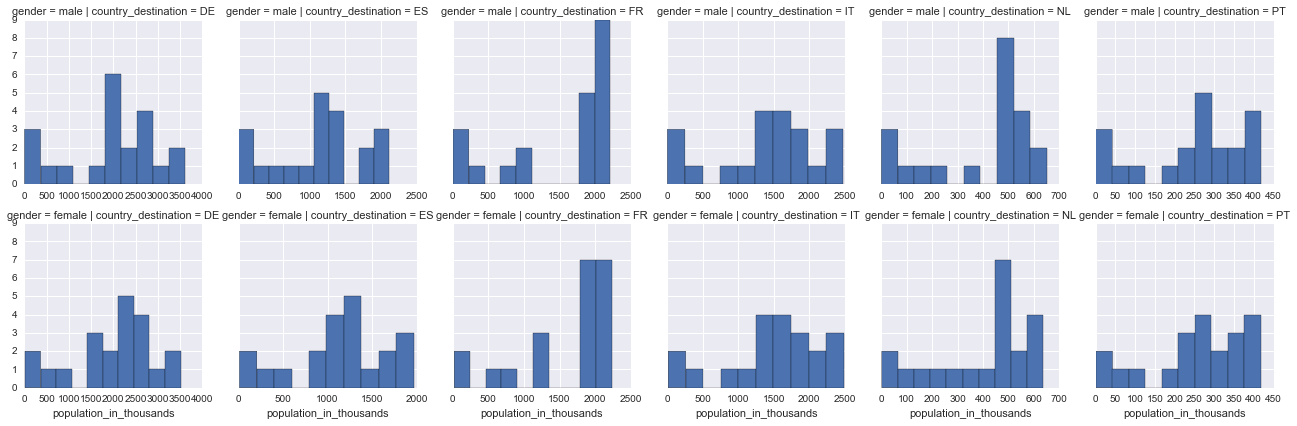

In [71]:
# compare gender distributions within destination countries
# it's too hard to make out all 10 countries with this graphic, so I'm splitting them in two.

# 6 European Union Countries
list_eu = ['FR', 'ES', 'IT', 'PT', 'NL','DE']
dest_eu = demographics[demographics['country_destination'].isin(list_eu)]
g = sns.FacetGrid(dest_eu, col="country_destination", row="gender", sharex=False) 
g = g.map(plt.hist, "population_in_thousands")

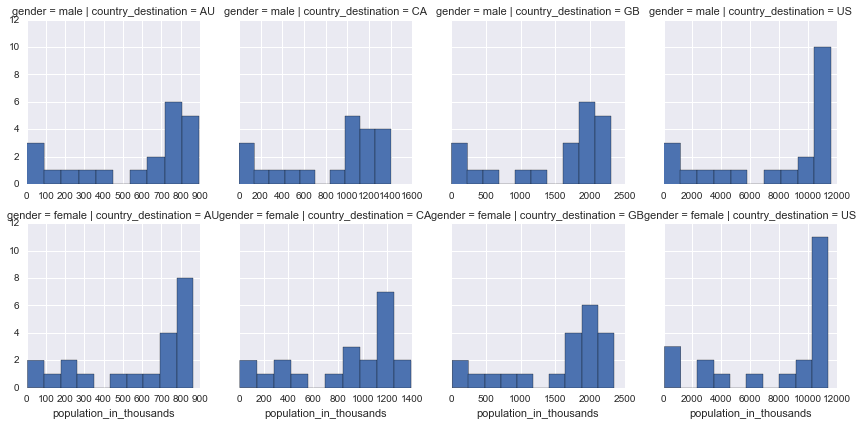

In [77]:
# 4 Countries outside of the European Union
list_rest = ['US', 'CA', 'GB', 'AU']
dest_rest = demographics[demographics['country_destination'].isin(list_rest)]

g = sns.FacetGrid(dest_rest, col="country_destination", row="gender", size=3, aspect=1, sharex=False) 
g = g.map(plt.hist, "population_in_thousands")

### Dataset #3: User Sessions 

In [13]:
# unzip and read user session data
zf = zipfile.ZipFile('data/sessions.csv.zip')
sessions = pd.read_csv(zf.open('sessions.csv'))

In [14]:
print("Rows: %0.0f; Columns: %0.0f" % np.shape(sessions))
sessions.head()

Rows: 10567737; Columns: 6


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435


### Dataset #4: Test Data

In [15]:
# unzip and read train data
zf = zipfile.ZipFile('data/train_users_2.csv.zip')
train = pd.read_csv(zf.open('train_users_2.csv'))

In [16]:
print("Rows: %0.0f; Columns: %0.0f" % np.shape(train))
train.head()

Rows: 213451; Columns: 16


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


Scrap

In [ ]:
#demographics['age_num'] = demographics['age_bucket'].map(lambda x: int(x[:str.find(x,'-')]))
list_nonus = ['FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU']
dest_nonus = demographics[demographics['country_destination'].isin(list_nonus)]

sns.violinplot(x='country_destination', y='population_in_thousands', hue='gender', data=dest_nonus,
               split=True, inner='stick', palette='Set3');